# Part I - (Fordgobike-TripData Data Exploration)
## by (Paul Wainaina)

## Introduction
The fordgobike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv("201902-fordgobike-tripdata.csv")
bikes.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
110137,584,2019-02-12 18:12:27.8460,2019-02-12 18:22:12.5900,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5273,Subscriber,1991.0,Female,No
99597,417,2019-02-14 19:34:47.4130,2019-02-14 19:41:44.8880,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,419,Subscriber,1980.0,Male,No
82859,391,2019-02-18 08:55:24.1760,2019-02-18 09:01:55.7180,16.0,Steuart St at Market St,37.794130,-122.394430,81.0,Berry St at 4th St,37.775880,-122.393170,6152,Subscriber,1970.0,Male,No
34109,2339,2019-02-24 08:32:55.4460,2019-02-24 09:11:54.5190,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,257.0,Fifth St at Delaware St,37.870407,-122.299676,4545,Subscriber,1975.0,Female,No
60422,1103,2019-02-20 18:29:11.1020,2019-02-20 18:47:34.6950,343.0,Bryant St at 2nd St,37.783172,-122.393572,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,5003,Subscriber,1988.0,Male,No


In [3]:
#high overview of the dataset shape and data types
print(bikes.shape)
bikes.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [4]:
#The descriptive statistics for numerical columns
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#Check for duplicated  values
bikes.duplicated().sum()

0

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb




### What is the structure of your dataset?

The forgobike dataset contains 183,412 rows and 16 columns. 

Most of the variables are numeric. 

The dataset contains floats integers and strings datatypes 
### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset include

The trip duration (start time and end time)

The member gender and age. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Member gender

Member birth-year (age)

User-Type

Bike-share-for-all-trip

Duration-sec

## Cleaning the dataset

In [7]:
#Making a copy of the dataset for cleaning 
bikes_df = bikes.copy() 

In [8]:
bikes_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
178364,1103,2019-02-01 17:07:21.6310,2019-02-01 17:25:45.4670,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,3646,Customer,1981.0,Male,No
70225,582,2019-02-19 18:28:01.4850,2019-02-19 18:37:43.6060,369.0,Hyde St at Post St,37.787349,-122.416651,365.0,Turk St at Fillmore St,37.780450,-122.431946,4610,Customer,1987.0,Female,No
168092,463,2019-02-04 16:14:18.8950,2019-02-04 16:22:01.9640,356.0,Valencia St at Clinton Park,37.769188,-122.422285,74.0,Laguna St at Hayes St,37.776435,-122.426244,4748,Customer,1986.0,Female,No
37091,1037,2019-02-23 14:39:04.8640,2019-02-23 14:56:22.7620,305.0,Ryland Park,37.342725,-121.895617,312.0,San Jose Diridon Station,37.329732,-121.901782,4031,Subscriber,1978.0,Male,No
28849,250,2019-02-25 08:20:30.8590,2019-02-25 08:24:41.0230,339.0,Jackson St at 11th St,37.800002,-122.266438,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,5723,Subscriber,1974.0,Female,No


In [9]:
#Convert the start time and end time datatype from string to datetime
bikes_df["start_time"] = pd.to_datetime(bikes_df.start_time)
bikes_df["end_time"] = pd.to_datetime(bikes_df.end_time)

In [10]:
bikes_df[["start_time", "end_time"]].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [11]:
# Extract the month, day and hour from start_time to form new columns 
bikes_df["start_hour"] = bikes_df.start_time.dt.hour
bikes_df["start_date"] = bikes_df.start_time.dt.day
bikes_df["start_day"] = bikes_df.start_time.dt.day_name()
bikes_df["end_date"] = bikes_df.end_time.dt.day
bikes_df["end_day"] = bikes_df.end_time.dt.day_name()
bikes_df["end_hour"] = bikes_df.end_time.dt.hour
bikes_df["month"] = bikes_df.start_time.dt.month_name()

# Remove the end_time and start_time columns
bikes_df.drop('end_time', axis=1, inplace=True)
bikes_df.drop('start_time', axis=1, inplace=True)
# convert seconds to minutes
bikes_df['duration_minutes'] = bikes_df["duration_sec"]/60

In [12]:
bikes_df.sample(5)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,start_hour,start_date,start_day,end_date,end_day,end_hour,month,duration_minutes
111315,473,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,26.0,1st St at Folsom St,37.787290,-122.394380,4946,...,Male,No,17,12,Tuesday,12,Tuesday,17,February,7.883333
9889,370,19.0,Post St at Kearny St,37.788975,-122.403452,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5422,...,Female,No,23,27,Wednesday,27,Wednesday,23,February,6.166667
179554,136,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,1304,...,Male,No,13,1,Friday,1,Friday,13,February,2.266667
85442,382,246.0,Berkeley Civic Center,37.869060,-122.270556,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,256,...,Male,No,15,17,Sunday,17,Sunday,15,February,6.366667
165064,303,75.0,Market St at Franklin St,37.773793,-122.421239,77.0,11th St at Natoma St,37.773507,-122.416040,1299,...,Male,No,7,5,Tuesday,5,Tuesday,7,February,5.050000


In [13]:
# Determine the number of missing values
bikes_df.isnull().sum()

duration_sec                  0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_hour                    0
start_date                    0
start_day                     0
end_date                      0
end_day                       0
end_hour                      0
month                         0
duration_minutes              0
dtype: int64

In [14]:
# Drop null values
bikes_df.dropna(inplace=True)
bikes_df.isnull().sum()

duration_sec               0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_hour                 0
start_date                 0
start_day                  0
end_date                   0
end_day                    0
end_hour                   0
month                      0
duration_minutes           0
dtype: int64

In [15]:
# converting member_birth_year to integer and getting the ages of the members 
bikes_df.member_birth_year = bikes_df.member_birth_year.astype(int)
bikes_df['age'] = 2019 - bikes_df.member_birth_year
bikes_df.member_birth_year.info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: member_birth_year
Non-Null Count   Dtype
--------------   -----
174952 non-null  int32
dtypes: int32(1)
memory usage: 2.0 MB


In [16]:
bikes_df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [17]:
#Remove unneccessary columns 
bikes_df.drop(["start_station_latitude","start_station_longitude", "end_station_latitude",
               "end_station_longitude"], axis=1, inplace=True)

# Test that column have been droped successfully
bikes_df.columns


Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'start_date', 'start_day', 'end_date', 'end_day',
       'end_hour', 'month', 'duration_minutes', 'age'],
      dtype='object')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.







#####  Creating a function for visualizing bar plots for univariate exploration

In [18]:
def bar_graph(df, values, title, xlab, ylab, order=None):
    #Creating the figure size
    plt.figure(figsize=(8,5), dpi=100)
    #Setting the color
    base_color = sb.color_palette()[0]
    #Plotting using seabon
    ax = sb.countplot(data = df, x=values, color=base_color, order=order)
    #Setting the title
    plt.title(title)
    #Labeling the x and y axiz  
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    # Dsiplay the plot
    plt.show()

### 1. What is the gender distribution?

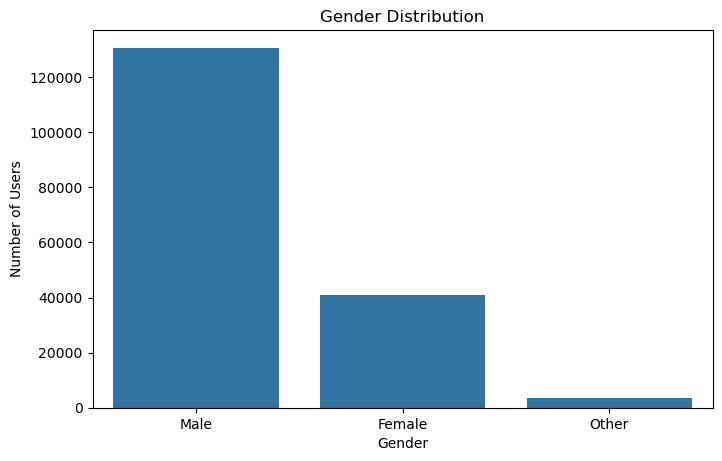

In [19]:
# barplot of gender usage
order1 = ['Male', 'Female', 'Other']
bar_graph(bikes_df, "member_gender", "Gender Distribution", "Gender", "Number of Users", order1)


There are more male riders as compared to females and other gender. Over 120000 users are males. 

In [20]:
# Creating a function for visualizing histograms for univariate exploration
def hist_distribution(data, x, titles):
    bins =  15     # Creating the bins for the histogram
    color=sb.color_palette()[0]       #Adding color
    sb.displot(data, x=x, height=7.0, aspect=2.0, bins=bins, kde = True, color=color);  #Ploting the displot
    plt.title(titles, fontdict={'fontsize': 20, 'fontweight': 'medium'})     # adding a tittle
    plt.xlabel(x.replace('_' ,' ').title(), fontdict={'fontsize': 16, 'fontweight': 'medium'}) # X label

### 2. What is the distribution of the users ages?

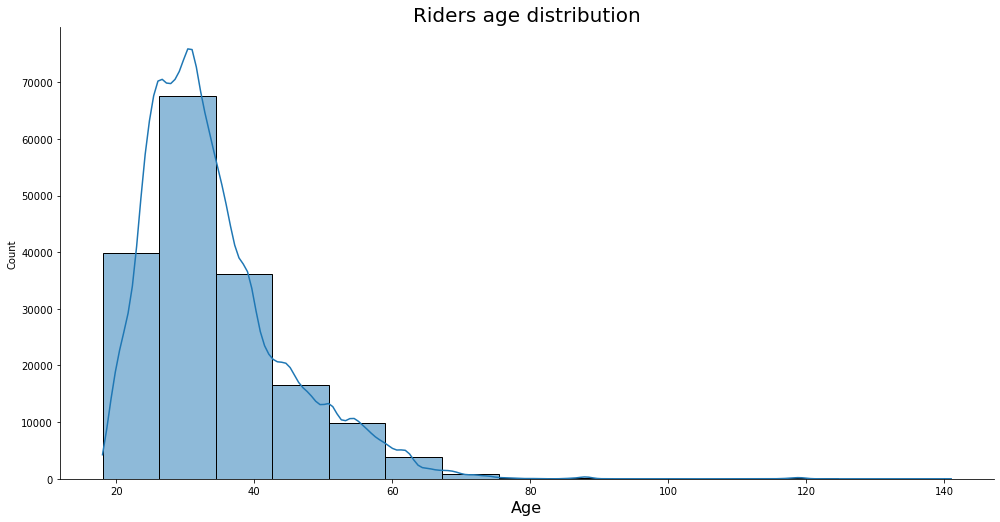

In [21]:
hist_distribution(bikes_df, "age", "Riders age distribution")

Most users are between the age of 20 and 40 years.

### 3. Checking the distribution of the trip duration in seconds. 

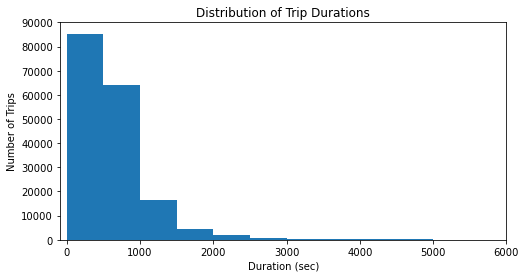

In [22]:

bins = np.arange(0, bikes_df['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 4])
plt.hist(data = bikes_df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-90, 6000, 0, 90000])
plt.show()

The longest trip duration is 5000 seconds. Most trip durations lie below 2000 seconds. 

Most users are young in age between 10 to 20. 

### 4. What is the distribution of the bike share users on all Trips?

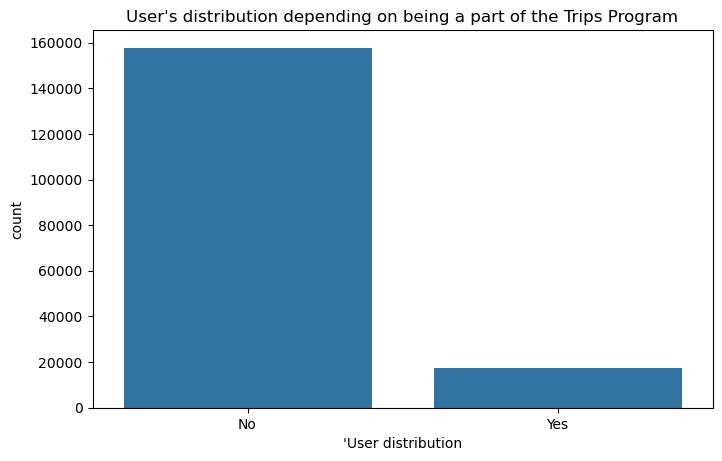

In [23]:
order = []
bar_graph(bikes_df, "bike_share_for_all_trip", "User's distribution depending on being a part of the Trips Program",
          "'User distribution", "count")


From this visualization, majority of users are not part of the trip program. 

### 5. What is the number of rides for each day

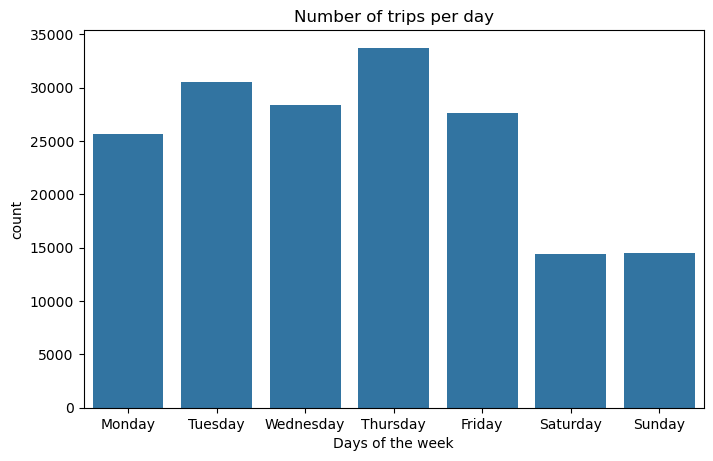

In [24]:
days = ('Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday', 'Saturday' , 'Sunday')
bar_graph(bikes_df, "start_day", "Number of trips per day", "Days of the week", "count", days)

###  6. What is the distribution for user Type? 

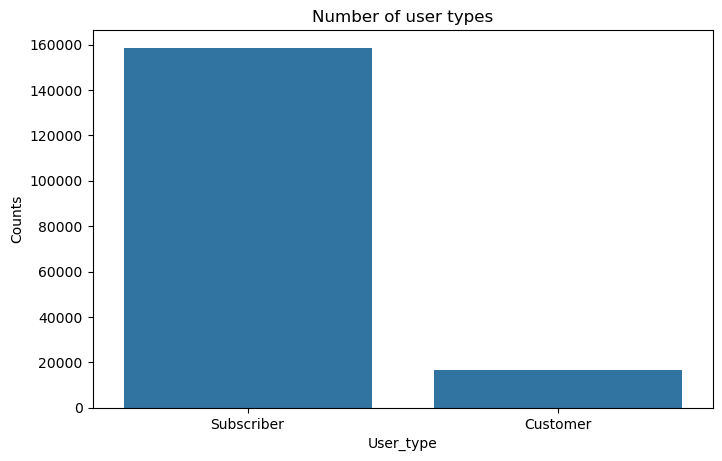

In [25]:
order = bikes_df['user_type'].value_counts().index
bar_graph(bikes_df,"user_type", "Number of user types", "User_type", "Counts",order)

From this visualization we can conclude that the majority of bike users are subscribers. 

Most users are a subscribers with 90.5% of total users. Customers represent 9.5% of the total users. 

### 7. What is the distribution of the trip duration in minutes? 

In [27]:
bikes_df['duration_minutes'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minutes, dtype: float64

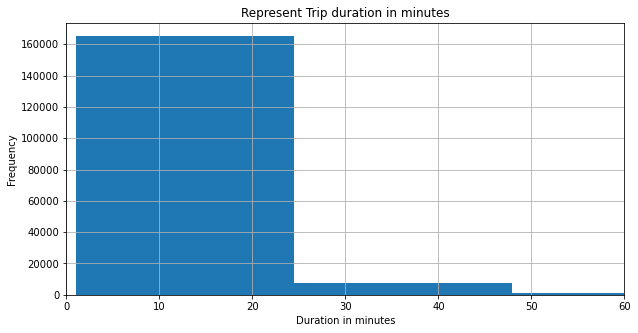

In [28]:
plt.figure(figsize = [10,5])
bikes_df['duration_minutes'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Represent Trip duration in minutes")

plt.show()



Most users spend less than 30 minutes per trip. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### Variable distribution
1. Most  users are subsribers and not customers. 
2. In terms of gender most users are males. 
3. Most users are not enrolled in the trip program according to the distribution of the bike share users on all Trips. 
4. Most users spend less than 30 minutes for a trip. 
5. The age distribution is left skewed. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I found some tidiness and quality issues in the forgobike dataset and performed the following cleaning to get better analysis results.  

1. Dropped the missing values in start_station_id, start_station_name, end_station_id, end_station_name,member_birth_year         and member_gender              

2. Dropped start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude' columns which were not so signifacant in analysing the data.

3. Extracted new columns from the start time and end time columns. 

4. Dropped the start-time and end-time columns.

5. Converted the start-time and end-time data type to datetime from string.

6. Created a new column 'age' from member_birth_date.

7. Changed the age datatype from float to int. 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

### 8. How long is the duration of the trip for each gender in minutes? 

Text(0.5, 1.0, 'Duration time for each gender in minutes')

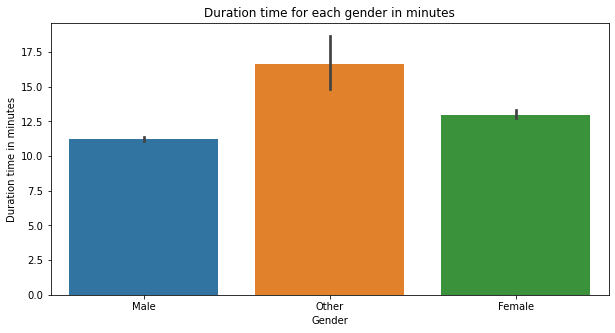

In [29]:
plt.figure(figsize = (10,5))

sb.barplot(data = bikes_df, x = "member_gender", y = "duration_minutes")

plt.xlabel('Gender')

plt.ylabel('Duration time in minutes')


plt.title("Duration time for each gender in minutes")


Males take shorter time as compared to female and other gender. 

### 9. How long is the duration of the trip for each user-type in minutes. 

Text(0.5, 1.0, 'Duration of the trip for each user type in minutes')

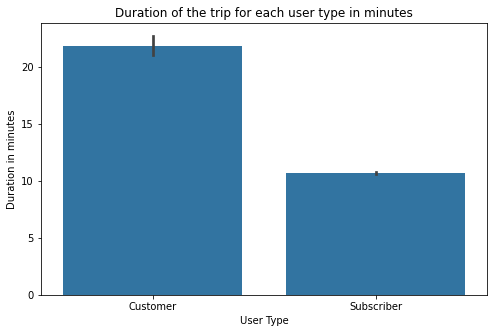

In [30]:
plt.figure(figsize = (8,5))
color = sb.color_palette()[0]
sb.barplot(data = bikes_df, x = "user_type", y = "duration_minutes", color = color)

plt.xlabel('User Type')

plt.ylabel('Duration in minutes')


plt.title("Duration of the trip for each user type in minutes")

From this visualization we can conclude that Customers go on a longer trip than the subscriber user type. 

### 10. Check the user distribution depending on their age and gender? 

Text(0.5, 1.0, 'User distribution depending on their Age and gender ')

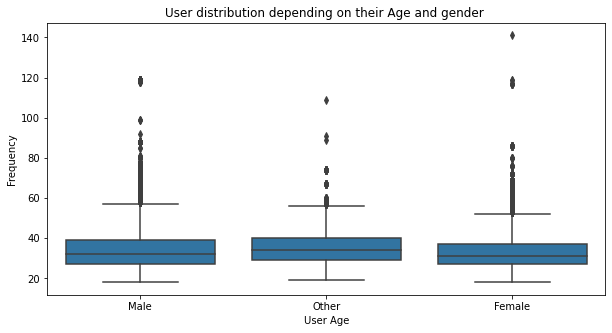

In [31]:
plt.figure(figsize = (10,5))

color = sb.color_palette()[0]

sb.boxplot(data=bikes_df,x ="member_gender", y = "age", color=color)


plt.xlabel('User Age')

plt.ylabel('Frequency')


plt.title("User distribution depending on their Age and gender ")

Female are more than other and more than male. 

### 11. Check the user distribution depending on their age and user-type? 

Text(0.5, 1.0, 'User distribution depending on their Age and user type ')

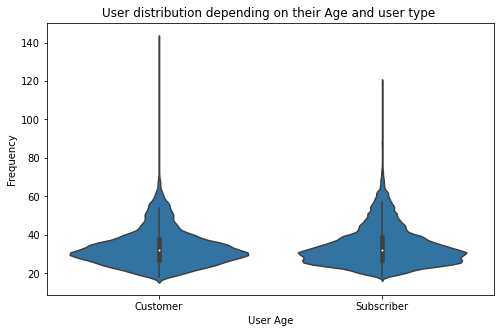

In [32]:
plt.figure(figsize = (8,5))

color = sb.color_palette()[0]

sb.violinplot(data=bikes_df,x = "user_type", y = "age", color=color)


plt.xlabel('User Age')

plt.ylabel('Frequency')


plt.title("User distribution depending on their Age and user type ")

Customer is more than the subscriber. 

### 12. The duration taken as per the age

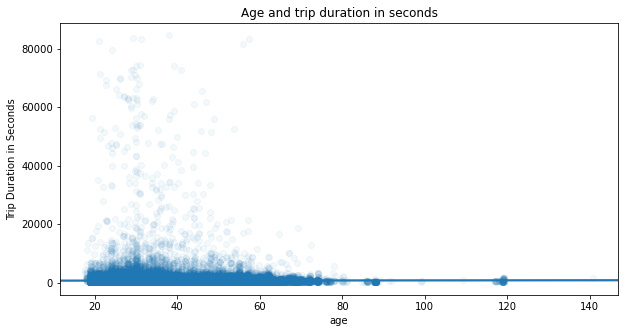

In [41]:
plt.figure(figsize=[10, 5])
#sns.regplot(data = df, x='Age', y='duration_sec'truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
sb.regplot(data=bikes_df, x = 'age', y = 'duration_sec', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.ylabel('Trip Duration in Seconds');
plt.title('Age and trip duration in seconds');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The user-type customer go for longer trip compared to a subscriber. 

The trip duration decrease with an increase in age.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 13. Explore the relationship between start day , gender and trip-durations (in minutes).

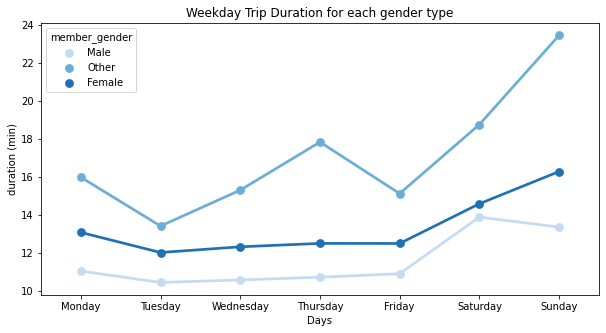

In [33]:
days = ('Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday', 'Saturday' , 'Sunday')
plt.figure(figsize=[10, 5])
sb.pointplot(data = bikes_df, x = 'start_day', y = 'duration_minutes', hue = 'member_gender',
             palette = 'Blues', ci=None, order=days)
plt.title('Weekday Trip Duration for each gender type')
plt.ylabel('duration (min)')
plt.xlabel('Days')
plt.xticks(np.arange(0, 6 + 1, 1))
plt.show()

Males have the shortest bike trips. 

The number of trip duration start rising mostly on weekends. 

###  14. What is the correlation between specific numeric variables in the forgobike dataset?

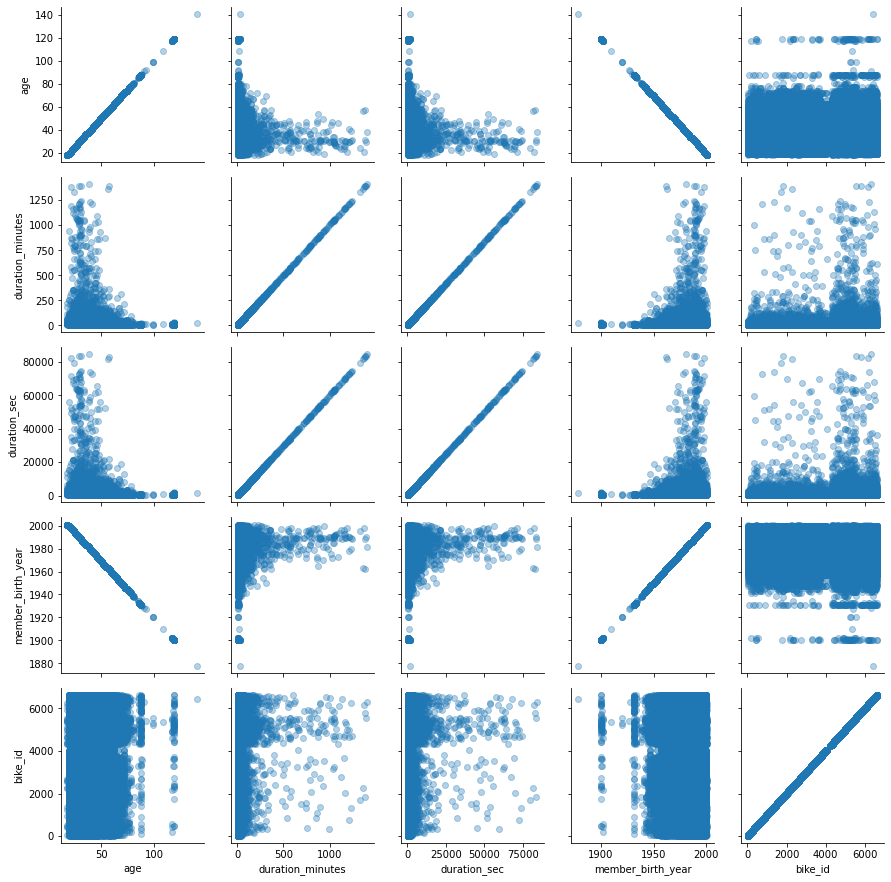

In [34]:
data = ['age', 'duration_minutes',"duration_sec", "member_birth_year", "bike_id"]
df = sb.PairGrid(data = bikes_df, vars = data) ;
df.map(plt.scatter, alpha = 1/3);
plt.show()

There is a negative correlation between member birth year and age. 

There is no significant correlation for any variable with the bike-id. 

There is no correlation between in variable with time. 

### 15.The relationship between age, gender and trip-durations (in minutes).

<Figure size 720x360 with 0 Axes>

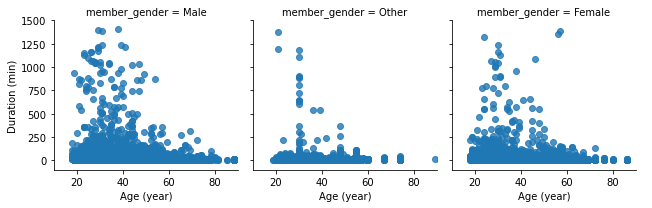

In [35]:
plt.figure(figsize=[10,5])
df = sb.FacetGrid(data = bikes_df, col = 'member_gender', col_wrap = 3, aspect =1,  xlim = [10, 90], ylim = [-100, 1500])
df.map_dataframe(sb.regplot, 'age', 'duration_minutes', fit_reg=False)
df.set_axis_labels('Age (year)', 'Duration (min)')
df.add_legend()
plt.show()

Comparing the gender types as it relates to trip duration, the age 10 to 30 represents the group that does most of the rides. 
Males anf females appear to have the same trip average. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Males have shorter bike trips as compared to other gender. 

### Were there any interesting or surprising interactions between features?

There is a negative correletaion between member birth year and age. 

## Conclusions
Most of the users are male.

Most of the bike users are subscribers. 

The distribution of female depending on their age is more than Male. 

Most users are not part of the bike share program. 

From the age distribution most users are young. 

The trip duration mostly ranges below 30 minutes. 
